In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../Datasets/air_quality_shilin.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65494 entries, 0 to 65493
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       65494 non-null  object 
 1   sitename   65494 non-null  object 
 2   aqi        65494 non-null  float64
 3   pollutant  65494 non-null  object 
 4   status     65494 non-null  object 
 5   so2        65494 non-null  float64
 6   co         65494 non-null  float64
 7   o3         65494 non-null  float64
 8   o3_8hr     65494 non-null  float64
 9   pm10       65494 non-null  float64
 10  pm2.5      65494 non-null  float64
 11  no2        65494 non-null  float64
 12  nox        65494 non-null  float64
 13  no         65494 non-null  float64
 14  windspeed  65494 non-null  float64
 15  winddirec  65494 non-null  float64
 16  co_8hr     65494 non-null  float64
 17  pm2.5_avg  65494 non-null  float64
 18  pm10_avg   65494 non-null  float64
 19  so2_avg    65494 non-null  float64
dtypes: flo

      date sitename   aqi pollutant    status   so2    co    o3  o3_8hr  pm10  \
0      NaT   Shilin  41.0    Normal      Good   0.4  0.31  25.8    44.6  18.0   
1      NaT   Shilin  45.0    Normal      Good   0.6  0.27  31.5    46.9  21.0   
2      NaT   Shilin  48.0    Normal      Good   0.7  0.29  36.7    50.8  26.0   
3      NaT   Shilin  50.0    Normal      Good   0.8  0.28  51.7    53.4  26.0   
4      NaT   Shilin  53.0     PM2.5  Moderate   1.3  0.29  59.8    54.3  35.0   
...    ...      ...   ...       ...       ...   ...   ...   ...     ...   ...   
65489  NaT   Shilin  27.0    Normal      Good   8.1  0.25  29.0    32.0  32.0   
65490  NaT   Shilin  27.0    Normal      Good   7.1  0.24  31.0    32.0  35.0   
65491  NaT   Shilin  27.0    Normal      Good  13.0  0.25  28.0    32.0  33.0   
65492  NaT   Shilin  26.0    Normal      Good   9.1  0.25  31.0    31.0  21.0   
65493  NaT   Shilin  26.0    Normal      Good   5.1  0.24  33.0    31.0  10.0   

       pm2.5   no2   nox   

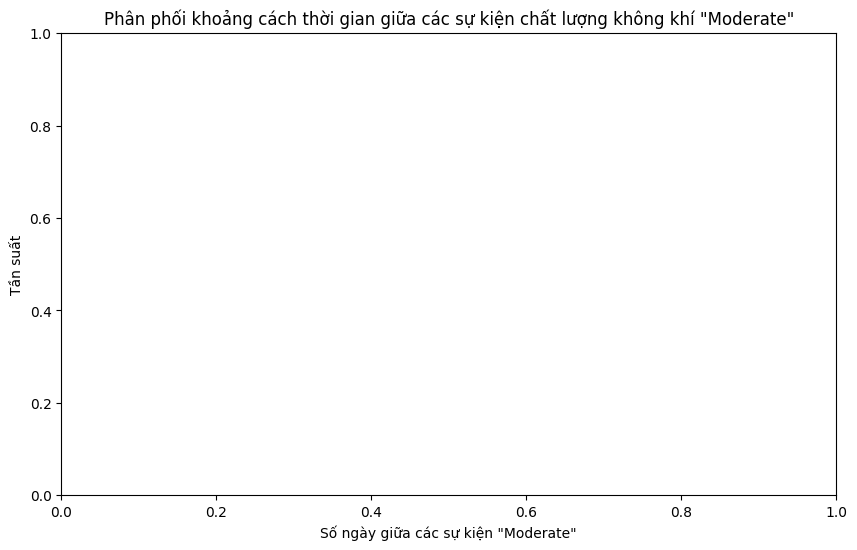

In [14]:


# Giả sử bạn đã tải dữ liệu vào DataFrame có tên là df
# df = pd.read_csv('your_data.csv')
# Chuyển cột 'date' sang kiểu datetime nếu chưa có
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y %H:%M", errors='coerce')

print(df[df['date'].isna()])
# Lọc các ngày có status là "Moderate"
moderate_days = df[df['status'] == 'Moderate']['date']

# Tính khoảng cách thời gian giữa các lần "Moderate" liên tiếp
time_diffs = moderate_days.diff().dropna()

# Tính thời gian trung bình giữa các lần "Moderate"
average_time_diff = time_diffs.mean()

print(f"Thời gian trung bình giữa các lần chất lượng không khí 'Moderate': {average_time_diff}")

# Vẽ biểu đồ phân phối khoảng cách thời gian giữa các lần "Moderate"
plt.figure(figsize=(10, 6))
sns.histplot(time_diffs.dt.days, bins=10, kde=True, color='skyblue')
plt.xlabel('Số ngày giữa các sự kiện "Moderate"')
plt.ylabel('Tần suất')
plt.title('Phân phối khoảng cách thời gian giữa các sự kiện chất lượng không khí "Moderate"')
plt.show()
